## 第7章 類別及物件 (Classes and Instances)

Python 晉升至現代軟體語言位階，也是基於物件導向（Object Oriented）的程式語言。這特色在軟體工程開發上來說，是舉足輕重的。這一章搞懂了，您 Python 功夫立刻提升百倍。
	
所有的物件（Object）在 Python 設計下就是某一個類別（Class）的實例（Instance），就像用模版來做出一樣的餅乾， Python 的物件透過類別就能描述及實體化，而且讓我們應用操作。

前面學習過的每一個常用物件都是 Python 系統內建的物件類別。

同樣的設計理念 Python 也基於其內建的物件上，讓我們可繼續以在程式中量身打造創新自己的類別和適合自己應用的物件。並依照自訂的類別建立實體化 (instantiate) 的實例 (instance)物件。
	
最後的一里路，就是我們如何將自訂的模型應用到想解決的問題，造福一方。
	
當我們建立起來的模型後，所謂物件實體化：
	
1. 就是 Python 會依物件類別及資料，規劃撥出一塊物件空間並載入到電腦記憶體中某一個位址
2. 透過變數範圍表，讓我們在程式中用變數來訪問這個物件或操作運算處理
3. 甚至於處理好的告一段落的大數據也可以用永久的或雲端的資料庫來儲存讓後來的人們繼續使用
	
總之在我們設計一套程式，必須善用载入 (import) 一些我們需要的 Python 內建或別人已開發好的類別物件 (class) 以外，自己還要具備創新能力，依自己的應用需求訂出一些自創的類別物件，來建構完善的模型，以便日後貢獻他人再加以利用。
    

## 7.1 學校模型

現在讓我們試做一個學校模型，以便處理學務事宜。比如學生教職員資料、註冊課程及成績登記等：
	
首先觀察與學校有關的人，我們發現以下：
	
1. 學校有三種人員：學員、教員、職員
2. 每一個人員都有姓名、生日及電郵
3. 每一個學員還有不同班別、學習不同的課程及其成績
4. 每一個教員有不同的教授課程
5. 若教員是班導師，就有所指導的班級及所屬學員
6. 每一個職員有不同的職稱及職務
7. ...等等
	
那麼我們該如何用 Python 建立一個物件導向的模型呢？這裡提供一些想法和實作了四個類別模版，如下：
	
1. 每一個人員都有姓名、生日及電郵
	- 建議：可以訂一個 Person 類別 (人員類別）	
2. 每一個學員還有不同班別、學習不同的課程及其成績
	- 建議：可以訂一個 Person 類別下的 Student 次類別 (學員類別) 而每一位學生都是屬於學員類別的一個物件 (實例)。
3. 每一個教員有不同的教育課程及指導班級
	建議：可以訂一個 Person 類別下的 Teacher 次類別 (教員類別)	
4. 每一個職員有不同的職務及職稱
	建議：可以訂一個 Person 類別下的 Staff 次類別 (職員類別)


## 7.2 模型的類別

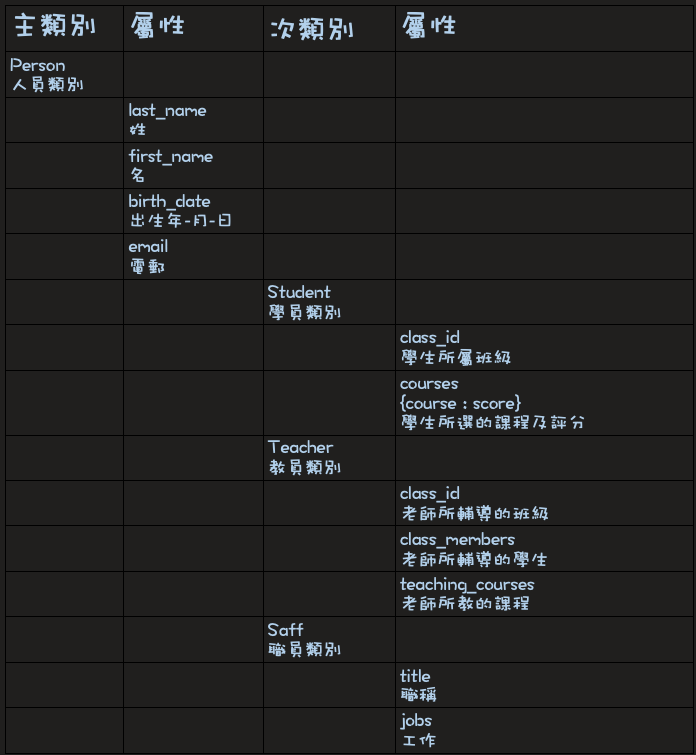

#### 依類別程式定義，實作 (存放於 'schoolModel_v1.py' 檔案) 如下：
    

In [2]:
"""學校模型，以便處理學務事宜 version 1"""

import datetime


class Person:
    """定義人員類別"""
    # 人員物件實體化 函式

    def __init__(self, last, first, dob):
        self.last_name = last
        self.first_name = first
        dob_yyyy, dob_mm, dob_dd = dob.split('-')
        self.birth_date = datetime.date(int(dob_yyyy),
                                        int(dob_mm),
                                        int(dob_dd))
    # 定義 email 屬性

    @property
    def email(self):
        return f'{self.last_name}{self.first_name}@school.edu.tw'

    # 定義 fullname 全名 屬性
    @property
    def fullname(self):
        return f'{self.last_name} {self.first_name}'

    # 定義 email 屬性
    @fullname.setter
    def fullname(self, name):
        last, first = name.split(' ')
        self.last_name = last
        self.first_name = first


class Student(Person):
    """定義學員類別"""

    def __init__(self, last, first, dob, class_id, courses=None):
        # 學員物件實體化 函式
        super().__init__(last, first, dob)
        self.class_id = class_id
        if courses is None:
            self.courses = {}
        else:
            self.courses = courses

    def add_classId(self, class_id):
        # 加入班級別 函式

        self.class_id = class_id

    def add_course(self, course, score=0):
        # 加入課程和分數 函式，課程不在就新增

        self.courses.update({course: score})

    def remove_course(self, course):
        # 退選課程 函式

        if course in self.courses:
            self.courses.pop(course)

    def print_courses(self):
        # 列印所選的課程及分數 函式

        print(self.fullname)
        for course, score in self.courses.item():
            print(f'--> {course}: {score}')


if __name__ == '__main__':
    # 主程式測試

    # 建立兩個學生資料
    student_1 = Student('尤', '勇', '2010-3-15', '6甲', {'數學': 0, '電腦': 0})
    student_2 = Student('夏', '琪', '2011-12-20', '6乙',
                        {'數學': 0, '電腦': 0, '藝術': 0})

    print(f'{student_1.fullname}')
    print(f'---> 生日 = {student_1.birth_date}')
    print(f'---> 電郵 = {student_1.email}')
    print(f'---> 班級 = {student_1.class_id}')
    print(f'---> 課程表 = {student_1.courses}\n')

    print(f'{student_2.fullname}')
    print(f'---> 生日 = {student_2.birth_date}')
    print(f'---> 電郵 = {student_2.email}')
    print(f'---> 班級 = {student_2.class_id}')
    print(f'---> 課程表 = {student_2.courses}\n')


尤 勇
---> 生日 = 2010-03-15
---> 電郵 = 尤勇@school.edu.tw
---> 班級 = 6甲
---> 課程表 = {'數學': 0, '電腦': 0}

夏 琪
---> 生日 = 2011-12-20
---> 電郵 = 夏琪@school.edu.tw
---> 班級 = 6乙
---> 課程表 = {'數學': 0, '電腦': 0, '藝術': 0}



#### 問：如何檢視類別從屬關係，尤其是別人先前建立的模型中類別從屬關係及定義內容？
答：的確，要是有原始碼就可以一目了然。

除此之外，Python 也提供一些內建函式可以查詢，列表如下：

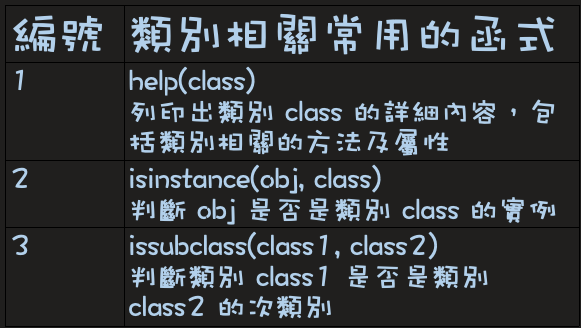

我們用上面學習的學校模型 (存放在 "schoolModel_v1.py" 模塊檔案中) 以便用載入指令 (import) 載入。
	
#### 檢視類別的例子如下：


In [3]:
import schoolModel_v1

person_1 = Person('高', '大雄', '2019-2-19')

print(f'{person_1.fullname}')
print(f'---> 生日 = {person_1.birth_date}')
print(f'---> 電郵 = {person_1.email}')

# help(class)
# 列印出類別 class 的詳細內容，包括類別相關的方法及屬性
print(help(Person))
print(help(Student))

# isinstance(obj, class)
# 判斷 obj 是否是類別 class 的實例
print(f'問：person_1 是類別 Person 的實例嗎？')
print(f'答：{isinstance(person_1, Person)}\n')

print(f'問：person_1 是類別 Student 的實例嗎？')
print(f'答：{isinstance(person_1, Student)}\n')


# issubclass(class1, class2)
# 判斷類別 class1 是否是類別 class2 的次類別
print(f'問：類別 Student 是類別 Person 的次類別嗎？')
print(f'答：{issubclass(Student, Person)}\n')

print(f'問：類別 Person 是類別 Student 的次類別嗎？')
print(f'答：{issubclass(Person, Student)}\n')


高 大雄
---> 生日 = 2019-02-19
---> 電郵 = 高大雄@school.edu.tw
Help on class Person in module __main__:

class Person(builtins.object)
 |  Person(last, first, dob)
 |  
 |  定義人員類別
 |  
 |  Methods defined here:
 |  
 |  __init__(self, last, first, dob)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  email
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  fullname

None
Help on class Student in module __main__:

class Student(Person)
 |  Student(last, first, dob, class_id, courses=None)
 |  
 |  定義學員類別
 |  
 |  Method resolution order:
 |      Student
 |      Person
 |      builtins.object
 |  
 |  Methods defined here:
 |  


## 7.3 學校模型 v2

上面學校模型實作剩下教職員工的類別，尚未完成。
    
這裡我們繼續定義教員次類別，並且存到 "schoolModel_v2.py" 檔案。

#### 程式定義如下：


In [4]:
"""學校模型，以便處理學務事宜 version 2"""
import datetime


class Person:
    """定義人員類別"""

    # 人員物件實體化 函式
    def __init__(self, last, first, dob):
        self.last_name = last
        self.first_name = first
        dob_yyyy, dob_mm, dob_dd = dob.split('-')
        self.birth_date = datetime.date(int(dob_yyyy),
                                        int(dob_mm),
                                        int(dob_dd))

    @property
    def email(self):
        # 定義 email 屬性
        return f'{self.last_name}{self.first_name}@school.edu.tw'

    @property
    def fullname(self):
        # 定義 fullname 全名 屬性
        return f'{self.last_name} {self.first_name}'

    @fullname.setter
    def fullname(self, name):
        # 定義 email 屬性
        last, first = name.split(' ')
        self.last_name = last
        self.first_name = first


class Student(Person):
    """定義學員類別"""

    def __init__(self, last, first, dob, class_id, courses=None):
        # 學員物件實體化 函式
        super().__init__(last, first, dob)
        self.class_id = class_id
        if courses is None:
            self.courses = {}
        else:
            self.courses = courses

    def add_classId(self, class_id):
        # 加入班級別 函式
        self.class_id = class_id

    def add_course(self, course, score=0):
        # 加入課程和分數 函式，課程不在就新增
        self.courses.update({course: score})

    def remove_course(self, course):
        # 退選課程 函式
        if course in self.courses:
            self.courses.pop(course)

    def print_courses(self):
        # 列印所選的課程及分數 函式
        print(self.fullname)
        for course, score in self.courses.items():
            print(f'--> {course}: {score}')


class Teacher(Person):
    # 定義教員類別

    def __init__(self, last, first, dob, class_id, members=None, courses=None):
        # 教員物件實體化 函式

        super().__init__(last, first, dob)
        self.class_id = class_id

        # 若不是班導師，學生列表為空
        if members is None:
            self.class_members = []
        else:
            self.class_members = members

        if courses is None:
            self.teaching_courses = []
        else:
            self.teaching_courses = courses

    def add_member(self, member):
        # 加入班上學生 函式
        if member not in self.class_members:
            self.class_members.append(member)

    def remove_member(self, member):
        # 移除班上學生 函式
        if member in self.class_members:
            self.employees.remove(member)

    def print_members(self):
        # 列印班上學生 函式
        print(f'{self.class_id}班導師 {self.fullname} 的學生名單:')
        for member in self.class_members:
            print('-->', member.fullname)
        print()

    def add_course(self, course):
        # 加入授課課程 函式
        if course not in self.teaching_courses:
            self.teaching_courses.append(course)

    def remove_course(self, course):
        # 移除授課課程 函式
        if course in self.teaching_courses:
            self.teaching_courses.remove(course)

    def print_courses(self):
        # 列印授課課程 函式
        print(f'{self.fullname} 授課列表: {self.teaching_courses}\n')


if __name__ == '__main__':
    # 主程式測試

    # 建立兩個教員資料
    teacher_1 = Teacher('高', '大雄', '1992-2-19', '6甲', courses=['數學', '電腦'])
    teacher_2 = Teacher('小', '叮噹', '1983-7-22', '6乙')
    teacher_2.add_course('藝術')
    teacher_2.add_course('設計')

    # 建立五個學生資料及班導師
    student_1 = Student('尤', '勇', '2010-3-15', '6甲', {'數學': 0, '電腦': 0})
    teacher_1.add_member(student_1)

    student_2 = Student('夏', '琪', '2011-12-20', '6乙',
                        {'數學': 0, '電腦': 0, '藝術': 0})
    teacher_2.add_member(student_2)

    student_3 = Student('王', '志明', '2010-3-15', '6甲', {'數學': 0})
    teacher_1.add_member(student_3)

    student_4 = Student('李', '春嬌', '2010-2-5', '6甲', {'電腦': 0})
    teacher_1.add_member(student_4)

    student_5 = Student('蔡', '小英', '2010-8-8', '6乙', {'設計': 0, '藝術': 0})
    teacher_2.add_member(student_5)

    # 列印兩個班導師資料
    print(f'{teacher_1.fullname}')
    print(f'---> 生日 = {teacher_1.birth_date}')
    print(f'---> 電郵 = {teacher_1.email}')
    print(f'---> 班級 = {teacher_1.class_id}')
    print(f'---> 教授課程 = {teacher_1.teaching_courses}\n')
    teacher_1.print_members()

    print(f'{teacher_2.fullname}')
    print(f'---> 生日 = {teacher_2.birth_date}')
    print(f'---> 電郵 = {teacher_2.email}')
    print(f'---> 班級 = {teacher_2.class_id}')
    print(f'---> 教授課程表 = {teacher_2.teaching_courses}\n')
    teacher_2.print_members()


高 大雄
---> 生日 = 1992-02-19
---> 電郵 = 高大雄@school.edu.tw
---> 班級 = 6甲
---> 教授課程 = ['數學', '電腦']

6甲班導師 高 大雄 的學生名單:
--> 尤 勇
--> 王 志明
--> 李 春嬌

小 叮噹
---> 生日 = 1983-07-22
---> 電郵 = 小叮噹@school.edu.tw
---> 班級 = 6乙
---> 教授課程表 = ['藝術', '設計']

6乙班導師 小 叮噹 的學生名單:
--> 夏 琪
--> 蔡 小英



### 問：期中考後，學生成績如何處理？
答：問得好。

有同學知道學員類別那個方法可以用嗎？
	
記得學員類別中的 courses 課程，我們特別設計成字典物件。也就是說，每一學生的課程有鍵值對 (key-value pair)，如下：


In [5]:
import schoolModel_v2

# 建立6甲班上學生資料
student_1 = Student('尤', '勇', '2010-3-15', '6甲', {'數學':0, '電腦':0})
student_2 = Student('王', '志明', '2010-3-15', '6甲', {'數學':0})
student_3 = Student('李', '春嬌', '2010-2-5', '6甲', {'電腦':0})

# 建立6甲班上學生考試成績
student_1.add_course('數學', 89)
student_1.add_course('電腦', 100)
student_2.add_course('數學', 99)
student_3.add_course('電腦', 95)

print('6甲班上學生考試成績')
student_1.print_courses()
student_2.print_courses()
student_3.print_courses()


6甲班上學生考試成績
尤 勇
--> 數學: 89
--> 電腦: 100
王 志明
--> 數學: 99
李 春嬌
--> 電腦: 95


## 7.4 學校模型 v3

上面學校模型實作剩下職員的類別，尚未完成。
	
最後我們繼續定義職員次類別，並且存到 "schoolModel_v3.py"檔案。

#### 學校模型 v3如下
	
另外還要介紹類別一個重要觀念，叫類別及實例變數。
	

In [6]:
"""學校模型，以便處理學務事宜 version 3"""
import datetime

# 定義人員類別


class Person:

    # 類別變數初值
    head_count = 0

    # 人員物件實體化 函式
    def __init__(self, last, first, dob):
        self.last_name = last
        self.first_name = first

        # Default dob format: yyyy-mm-dd
        dob_yyyy, dob_mm, dob_dd = dob.split('-')
        self.birth_date = datetime.date(int(dob_yyyy),
                                        int(dob_mm),
                                        int(dob_dd))
        # 實體化一次加一個人
        Person.head_count += 1

    # 定義 email 屬性
    @property
    def email(self):
        return f'{self.last_name}{self.first_name}@school.edu.tw'

    # 定義 fullname 全名 屬性
    @property
    def fullname(self):
        return f'{self.last_name} {self.first_name}'

    # 定義 email 屬性
    @fullname.setter
    def fullname(self, name):
        last, first = name.split(' ')
        self.last_name = last
        self.first_name = first

# 定義學員類別


class Student(Person):

    # 學員物件實體化 函式
    def __init__(self, last, first, dob, class_id, courses=None):
        super().__init__(last, first, dob)
        self.class_id = class_id
        if courses is None:
            self.courses = {}
        else:
            self.courses = courses

    # 加入班級別 函式
    def add_classId(self, class_id):
        self.class_id = class_id

    # 加入課程和分數 函式，課程不在就新增
    def add_course(self, course, score=0):
        self.courses.update({course: score})

    # 退選課程 函式
    def remove_course(self, course):
        if course in self.courses:
            self.courses.pop(course)

    # 列印所選的課程及分數 函式
    def print_courses(self):
        print(self.fullname)
        for course, score in self.courses.items():
            print(f'--> {course}: {score}')

# 定義教員類別


class Teacher(Person):

    # 教員物件實體化 函式
    def __init__(self, last, first, dob, class_id, members=None, courses=None):
        super().__init__(last, first, dob)
        self.class_id = class_id

        # 若不是班導師，學生列表為空
        if members is None:
            self.class_members = []
        else:
            self.class_members = members

        if courses is None:
            self.teaching_courses = []
        else:
            self.teaching_courses = courses

    # 加入班上學生 函式
    def add_member(self, member):
        if member not in self.class_members:
            self.class_members.append(member)

    # 移除班上學生 函式
    def remove_member(self, member):
        if member in self.class_members:
            self.teaching_courses.remove(member)

    # 列印班上學生 函式
    def print_members(self):
        print(f'{self.class_id}班導師 {self.fullname} 的學生名單:')
        for member in self.class_members:
            print('-->', member.fullname)
        print()

    # 加入授課課程 函式
    def add_course(self, course):
        if course not in self.teaching_courses:
            self.teaching_courses.append(course)

    # 移除授課課程 函式
    def remove_course(self, course):
        if course in self.teaching_courses:
            self.teaching_courses.remove(course)

    # 列印授課課程 函式
    def print_courses(self):
        print(f'{self.fullname} 授課列表: {self.teaching_courses}\n')

# 定義職員類別


class Staff(Person):

    # 職員物件實體化 函式
    def __init__(self, last, first, dob, title, jobs=None):
        super().__init__(last, first, dob)
        self.title = title

        if jobs is None:
            self.jobs = []
        else:
            self.jobs = jobs


# 主程式測試
if __name__ == '__main__':
    # 建立兩個職員資料
    staff_1 = Staff('秦', '煙投', '1958-6-7', '校長', ['學務', '沒人做的雜務'])

    print(f'{staff_1.fullname}')
    print(f'---> 職稱：{staff_1.title}')
    print(f'---> 職務：{staff_1.jobs}\n')

    # 類別變數可以繼承 (inheritance)
    print(f'全校共有: {staff_1.head_count} 人\n')

    staff_2 = Staff('郝', '佳再', '1988-9-9', '教務長', ['學生教務', '教師人事'])

    print(f'{staff_2.fullname}')
    print(f'---> 職稱：{staff_2.title}')
    print(f'---> 職務：{staff_2.jobs}\n')

    print(f'全校共有: {Person.head_count} 人\n')


秦 煙投
---> 職稱：校長
---> 職務：['學務', '沒人做的雜務']

全校共有: 1 人

郝 佳再
---> 職稱：教務長
---> 職務：['學生教務', '教師人事']

全校共有: 2 人



### 作者後語

朋友捎來一則 Line：「Happy Valentine's Day!! (今天開學) 」方驚覺編寫已經半月有餘了。電子書改版不是難事，就此打住，版本 1.0 的『小朋友玩大蟒蛇』分享給大家。先給小朋友試試水溫吧！

請小朋友幫個忙，指出難懂的地方或改善之道，歡迎電郵分享。讓下次改版更完善，甘溫喔！
	
最後迴向：
	
					願以此功德
					普及於世界
					疫情早遠離
					人類上火星

#### 高嘉祥
2022.2.14

mkaoy2k@gmail.com
